# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import os
import re
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [2]:
# data_path = os.path.join(os.path.dirname(os.getcwd()), "data", "liver2.csv")
data_path = os.path.join(os.path.dirname(os.getcwd()), "data", "case_duration_all.csv")

df = pd.read_csv(data_path)

c:\users\lliu10\anaconda3\envs\lp_pyomo\lib\site-packages\IPython\core\interactiveshell.py:3221: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df['Primary Procedure CPT Code']=df['Primary Procedure CPT Code'].str.replace('\D+','')
df = df.dropna() # drop cases without all information
limit = 480
df=df[df['Actual Room Duration']<limit]
low_lim = 120
df=df[df['Actual Room Duration']>low_lim]
bmi_limit = 80
df=df[df['BMI']<bmi_limit]
height_limit = 100
df=df[df['Height (cm)']>height_limit]
df['Primary Procedure CPT Code']=df['Primary Procedure CPT Code'].astype(int)

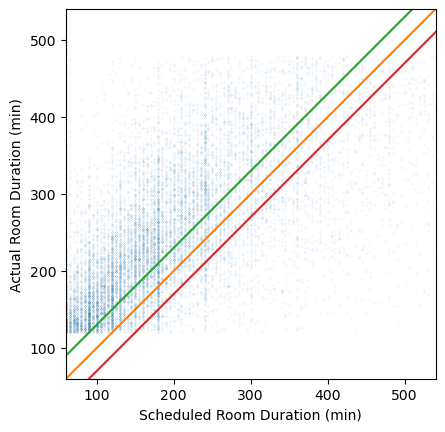

In [4]:
plt.plot(df['Scheduled Room Duration'],df['Actual Room Duration'],'.', MarkerSize = 0.1)
plt.gca().set_aspect('equal')
plt.plot((0, 1000), (0, 1000))
plt.plot((0, 1000), (30, 1030))
plt.plot((0, 1000), (-30, 970))
plt.xlim(low_lim-60, limit+60)
plt.ylim(low_lim-60, limit+60)
plt.xlabel('Scheduled Room Duration (min)')
plt.ylabel('Actual Room Duration (min)')
plt.show()

In [5]:
diff = df['Scheduled Room Duration']-df['Actual Room Duration']
over = diff[diff > 30].count()/diff.count()
under = diff[diff < -30].count()/diff.count()
good = 1 - over - under

In [6]:
print('accurate', round(good*100) , 'overscheduled', round(over*100), 'underscheduled',round(under*100))
print('accurate', round(np.mean(diff[(diff <= 30) & (diff >=-30)])))
print('overscheduled', round(np.mean(diff[diff > 30])))
print('underscheduled', round(np.mean(diff[diff < -30])))

accurate 20.0 overscheduled 14.0 underscheduled 66.0
accurate -6.0
overscheduled 132.0
underscheduled -95.0


In [7]:
print(np.mean(diff[diff < -30]))

-95.14421768707483


In [8]:
print(np.mean(diff[diff < -30]))

-95.14421768707483


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,
          0.,   1.,   0.,   0.,   1.,   1.,   3.,   2.,   0.,   0.,   0.,
          0.,   1.,   0.,   2.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          3.,   0.,   0.,   0.,   1.,   3.,   0.,   1.,   0.,   1.,   3.,
          3.,   1.,   0.,   2.,   2.,   1.,   1.,   0.,   1.,   0.,   0.,
          0.,   3.,   5.,   1.,   0.,   2.,   0.,   3.,   2.,   1.,   1.,
          1.,   3.,   0.,   0.,   2.,   2.,   7.,   0.,   4.,   1.,   2.,
          4.,   1.,   1.,   1.,   6.,   4.,   0.,   4.,   0.,   0.,   6.,
          3.,   3.,   3.,   3.,   9., 

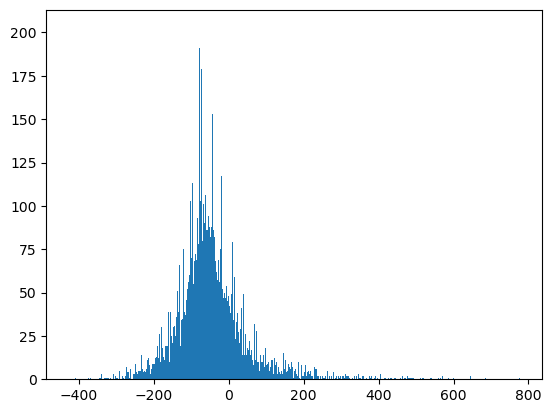

In [9]:
plt.hist(diff,bins = 1000)

Text(0.5, 0, 'Age (years)')

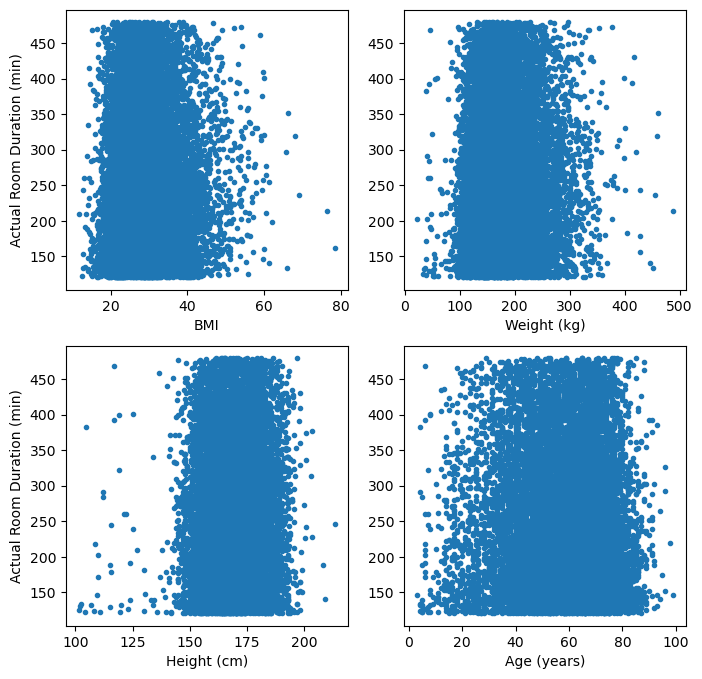

In [10]:
fig, axs = plt.subplots(2,2, figsize=(8,8))
axs[0,0].plot(df['BMI'],df['Actual Room Duration'],'.')
axs[0,0].set_xlabel('BMI')
axs[0,0].set_ylabel('Actual Room Duration (min)')
axs[0,1].plot(df['Weight (kg)'],df['Actual Room Duration'],'.')
axs[0,1].set_xlabel('Weight (kg)')
axs[1,0].plot(df['Height (cm)'],df['Actual Room Duration'],'.')
axs[1,0].set_xlabel('Height (cm)')
axs[1,0].set_ylabel('Actual Room Duration (min)')
axs[1,1].plot(df['Age at Surgery'],df['Actual Room Duration'],'.')
axs[1,1].set_xlabel('Age (years)')

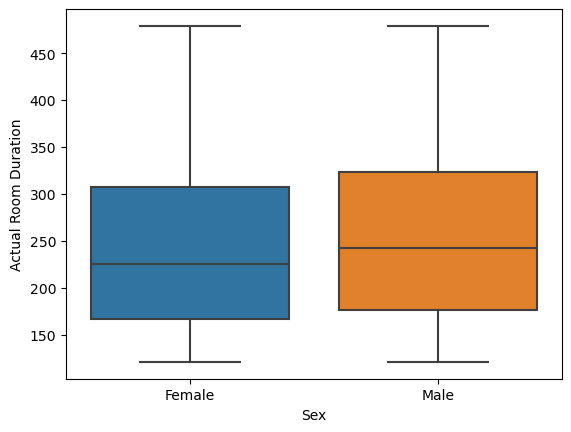

In [11]:
sb.boxplot( x = 'Sex',y = 'Actual Room Duration', data = df )

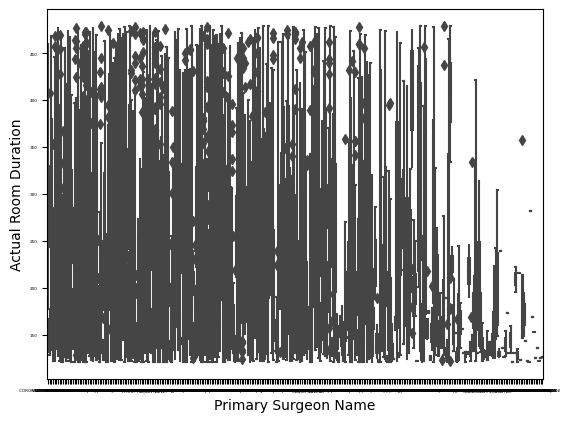

In [12]:
b = sb.boxplot( x = 'Primary Surgeon Name',y = 'Actual Room Duration', data = df )
b.tick_params(labelsize=3)

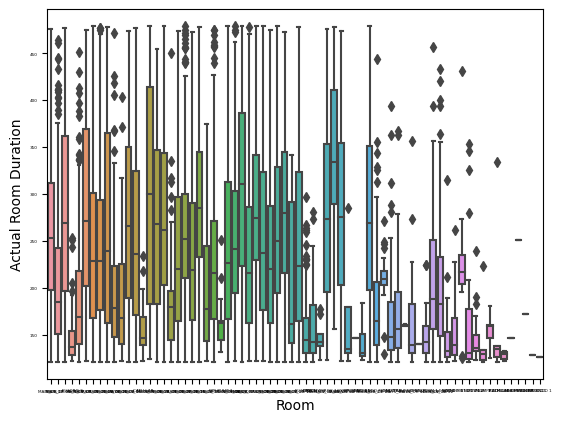

In [13]:
b = sb.boxplot(x = 'Room',y = 'Actual Room Duration', data = df )
b.tick_params(labelsize=3)

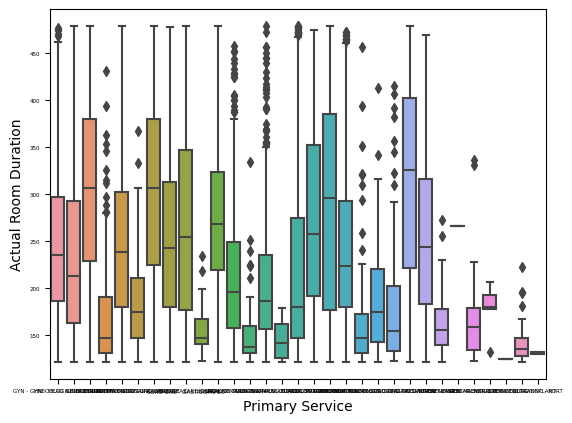

In [14]:
b = sb.boxplot(x = 'Primary Service',y = 'Actual Room Duration', data = df )
b.tick_params(labelsize=4)

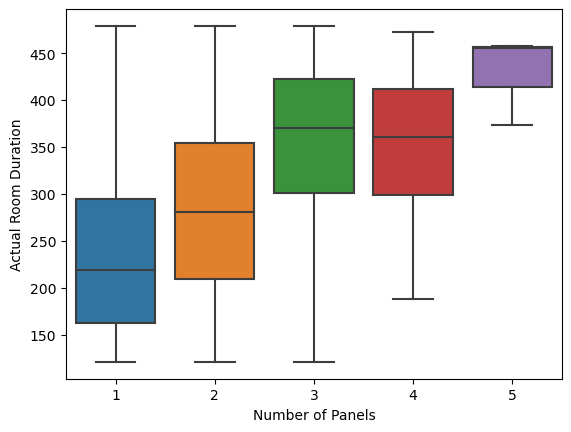

In [15]:
b = sb.boxplot(x = 'Number of Panels',y = 'Actual Room Duration', data = df )

In [16]:
features_to_encode = ['Primary Surgeon Name', 'Primary Service', 'Sex', 'Room']
col_trans = make_column_transformer(
                        (OneHotEncoder(),features_to_encode),
                        remainder = "passthrough"
                        )

In [17]:
# X = df[['Primary Surgeon Name', 'Primary Service', 'Sex','Room','Number of Panels','Scheduled Room Duration', 'BMI', 'Age at Surgery', 'Height (cm)','Weight (kg)']]
X = df[['Primary Surgeon Name', 'Primary Service', 'Sex','Room','Number of Panels','Scheduled Room Duration', 'BMI', 'Age at Surgery', 'Height (cm)','Weight (kg)', 'Primary Procedure CPT Code']]
# X = df[['Primary Surgeon Name', 'Primary Service', 'Sex','Room','Number of Panels', 'BMI', 'Age at Surgery', 'Height (cm)','Weight (kg)', 'Primary Procedure CPT Code']]
y = df['Actual Room Duration']

In [18]:
# model = LinearRegression()
model = GradientBoostingRegressor()
pipe = make_pipeline(col_trans, model)
pipe.fit(X, y)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['Primary Surgeon Name',
                                                   'Primary Service', 'Sex',
                                                   'Room'])],
                                   verbose=...
  

In [19]:
y_pred = pipe.predict(X)

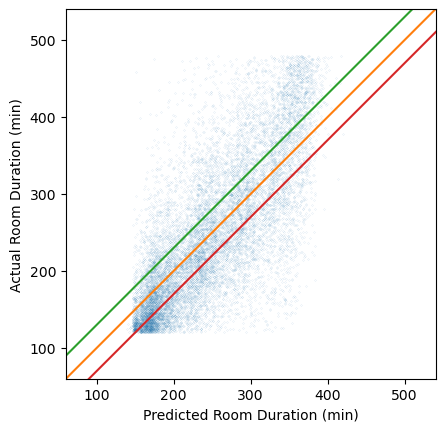

In [27]:
plt.plot(y_pred,y,'.', MarkerSize=.1)
plt.gca().set_aspect('equal')
plt.plot((0, 1000), (0, 1000))
plt.plot((0, 1000), (30, 1030))
plt.plot((0, 1000), (-30, 970))
plt.xlim(low_lim-60, limit+60)
plt.ylim(low_lim-60, limit+60)
plt.xlabel('Predicted Room Duration (min)')
plt.ylabel('Actual Room Duration (min)')
plt.show()

In [21]:
diff = y_pred-y
over = diff[diff > 30].count()/diff.count()
under = diff[diff < -30].count()/diff.count()
good = 1 - over - under

In [22]:
print('accurate', round(good*100) , 'overscheduled', round(over*100), 'underscheduled',round(under*100))
print('accurate', round(np.mean(diff[(diff <= 30) & (diff >=-30)])))
print('overscheduled', round(np.mean(diff[diff > 30])))
print('underscheduled', round(np.mean(diff[diff < -30])))

accurate 41.0 overscheduled 31.0 underscheduled 28.0
accurate 3.0
overscheduled 64.0
underscheduled -78.0


In [23]:
def encode_and_bind(original_dataframe, features_to_encode):
    dummies = pd.get_dummies(original_dataframe[features_to_encode])
    res = pd.concat([dummies, original_dataframe], axis=1)
    res = res.drop(features_to_encode, axis=1)
    return(res)
X_train_encoded = encode_and_bind(X, features_to_encode)

In [24]:
def encode_and_bind(original_dataframe, features_to_encode):
    dummies = pd.get_dummies(original_dataframe[features_to_encode])
    res = pd.concat([dummies, original_dataframe], axis=1)
    res = res.drop(features_to_encode, axis=1)
    return(res)
X_train_encoded = encode_and_bind(X, features_to_encode)

In [25]:
feature_importances = list(zip(X_train_encoded, model.feature_importances_))
# Then sort the feature importances by most important first
feature_importances_ranked = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances_ranked];

Feature: Scheduled Room Duration             Importance: 0.8710635174236822
Feature: Primary Procedure CPT Code          Importance: 0.03490332111110308
Feature: Weight (kg)                         Importance: 0.014554352752926915
Feature: Number of Panels                    Importance: 0.009985063689512757
Feature: Primary Service_GASTROENTEROLOGY    Importance: 0.008852702914371333
Feature: Primary Surgeon Name_ADIBI, MEHRAD  Importance: 0.005542400792727567
Feature: Primary Service_COLON & RECTAL SURGERY Importance: 0.004997352470769867
Feature: BMI                                 Importance: 0.004522201315559454
Feature: Primary Service_PLS - PLASTIC SURGERY Importance: 0.0037472658117253337
Feature: Primary Surgeon Name_CHEN, STEPHEN  Importance: 0.002644348707325005
Feature: Primary Service_UROLOGY             Importance: 0.002582031407032173
Feature: Primary Service_GYN - GYNECOLOGIC ONCOLOGY Importance: 0.001897241208583278
Feature: Primary Service_NEUROSURGERY        Importanc

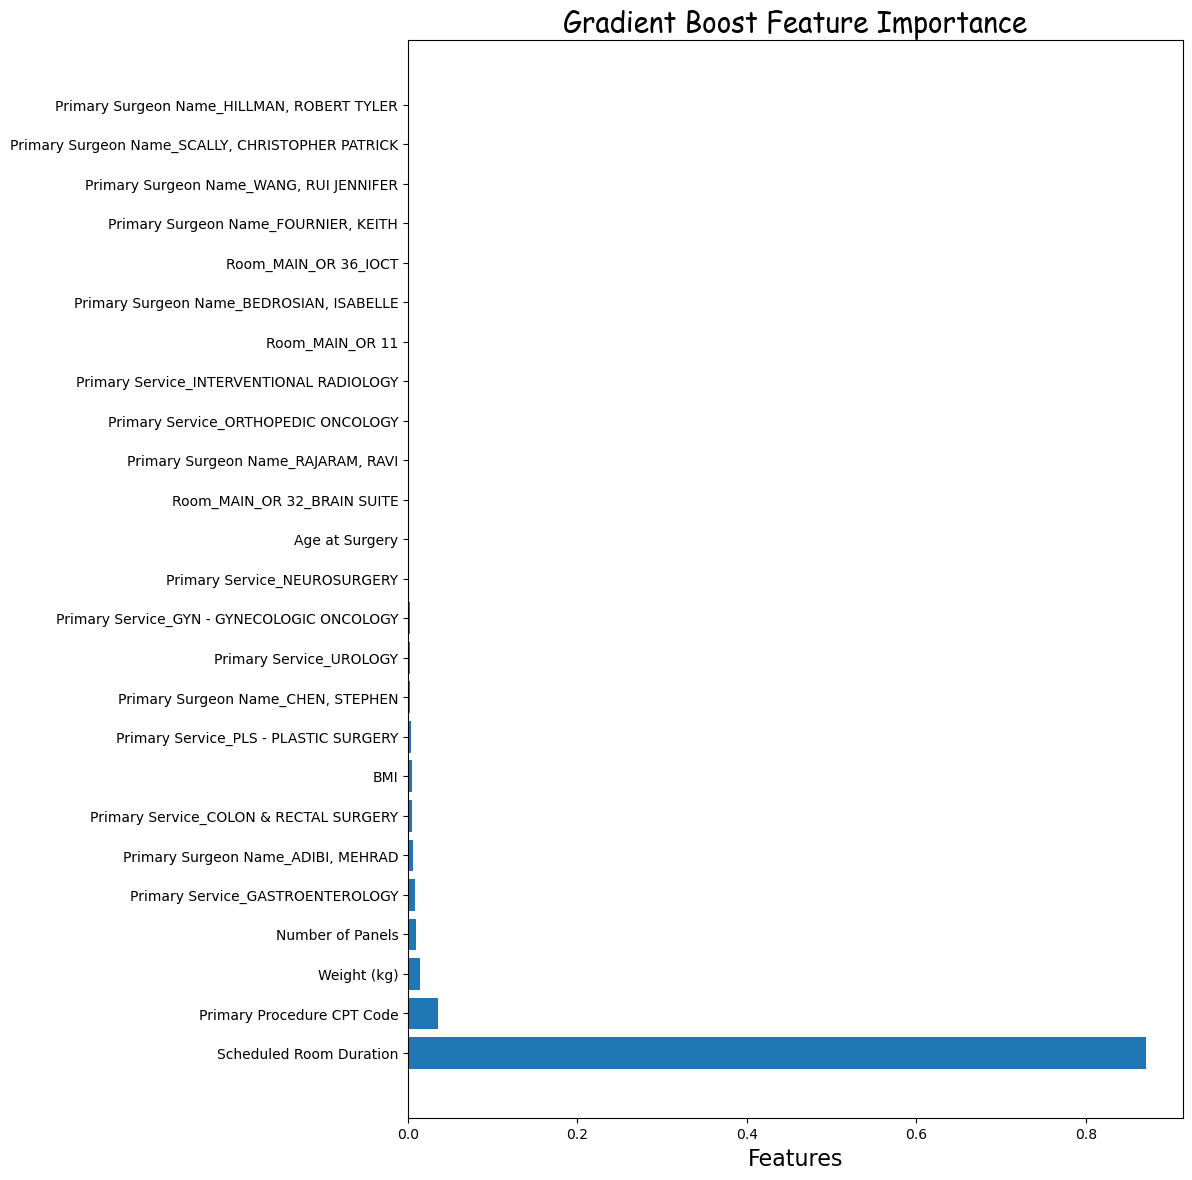

In [26]:
feature_names_25 = [i[0] for i in feature_importances_ranked[:25]]
y_ticks = np.arange(0, len(feature_names_25))
x_axis = [i[1] for i in feature_importances_ranked[:25]]
plt.figure(figsize = (10, 14))
plt.barh(feature_names_25, x_axis)   #horizontal barplot
plt.title('Gradient Boost Feature Importance',
          fontdict= {'fontname':'Comic Sans MS','fontsize' : 20})
plt.xlabel('Features',fontdict= {'fontsize' : 16})
plt.show()